<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint7/Module1/O4_UseTheClassificationMetricROC_AUCToInterpretAClassifierModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TPR is also the Recall

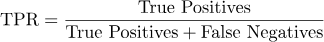

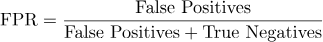

In [ ]:
# the denominators are exact opposites of each other

In [ ]:
# Load modules
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

# Create the data (feature, target)
X, y = make_classification(n_samples=10000, n_features=5,
                          n_classes=2, n_informative=3,
                          random_state=42)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and fit the model
logreg_classifier = LogisticRegression().fit(X_train, y_train)

# Create predicted probabilities
y_pred_prob = logreg_classifier.predict_proba(X_test)[:,1]

In [ ]:
# Create the data for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# See the results in a table
roccurve_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds
})

roccurve_df.head()

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.999969
1,0.000000,0.000786,0.999969
2,0.000000,0.291438,0.983222
3,0.000815,0.291438,0.983049
4,0.000815,0.360566,0.970583


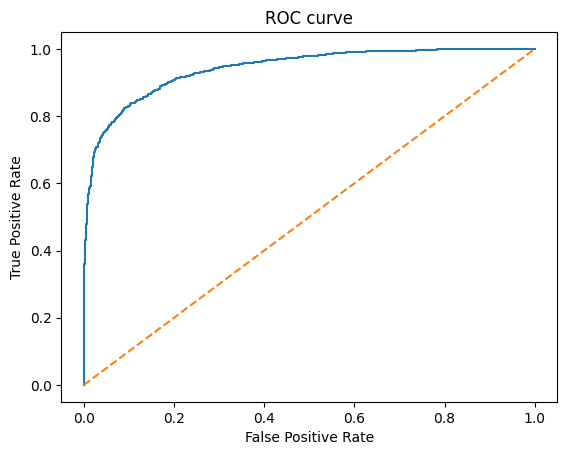

In [ ]:
# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0,1], ls='--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

The above model looks pretty good. In general, the better a model, the higher the curve is, and the greater the area under the curve (AUC). The maximum value for the AUC is equal to one. While we can "eyeball" the area in our curve, there is also a tool used to calculate the AUC.

- diagonal line is when TPR = FPR, it's like our baseline, anything to the right, might as well don't use a model
- we're aiming at a curve to the left of the diagonal line
- ideal curve - TPR as high as possible, FPR as low, closet point on curve to the top left corner

In [ ]:
# Calculate the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9419681927513379